In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

%matplotlib inline

In [10]:
df1= pd.read_csv('./eda_feature_engineered.csv')
df1.dropna(subset=['Total_Sqft', 'SalePrice'], inplace=True)

In [11]:
df1.corr(numeric_only = True)

,Id,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice,Total_Sqft
Id,1.000000,0.032829,-0.061629,-0.026007,-0.064521,-0.090223,-0.035539,0.008555,-0.038346,-0.022704,...,-0.037639,-0.050850,-0.048756,-0.045278,-0.009102,0.001328,0.127682,-0.975747,-0.051518,-0.035096
Lot Area,0.032829,1.000000,0.105448,-0.018806,0.035757,0.050323,0.169237,0.041184,0.277175,0.381469,...,0.289277,0.004473,0.214724,0.263103,0.155439,0.140681,0.002957,-0.029406,0.296328,0.360591
Overall Qual,-0.061629,0.105448,1.000000,-0.081907,0.602777,0.584168,0.438541,0.275773,0.548742,0.476955,...,0.388540,0.574120,0.587151,0.563578,0.256724,0.308544,0.018671,-0.011461,0.800027,0.665615
Overall Cond,-0.026007,-0.018806,-0.081907,1.000000,-0.370666,0.043693,-0.135582,-0.130521,-0.158643,-0.150587,...,-0.005879,-0.331167,-0.167979,-0.137431,0.011504,-0.051841,-0.002631,0.047576,-0.096277,-0.145466
Year Built,-0.064521,0.035757,0.602777,-0.370666,1.000000,0.628958,0.329589,0.136662,0.410254,0.323127,...,0.168529,0.825233,0.542353,0.486986,0.216102,0.207564,-0.007422,-0.003489,0.571646,0.412684
Year Remod/Add,-0.090223,0.050323,0.584168,0.043693,0.628958,1.000000,0.211142,0.160066,0.308545,0.243837,...,0.138242,0.673687,0.441386,0.398623,0.215859,0.264114,0.010935,0.042908,0.549923,0.395620
Mas Vnr Area,-0.035539,0.169237,0.438541,-0.135582,0.329589,0.211142,1.000000,0.085853,0.408575,0.391234,...,0.268922,0.266506,0.361047,0.384573,0.163413,0.163323,-0.001698,-0.018673,0.512118,0.468395
Bsmt Unf SF,0.008555,0.041184,0.275773,-0.130521,0.136662,0.160066,0.085853,1.000000,0.419238,0.302299,...,0.001821,0.177751,0.167905,0.145080,-0.034438,0.116019,0.020043,-0.043683,0.190210,0.347505
Total Bsmt SF,-0.038346,0.277175,0.548742,-0.158643,0.410254,0.308545,0.408575,0.419238,1.000000,0.808756,...,0.333100,0.348384,0.432979,0.488805,0.224659,0.257227,0.003915,-0.004280,0.628925,0.821524
1st Flr SF,-0.022704,0.381469,0.476955,-0.150587,0.323127,0.243837,0.391234,0.302299,0.808756,1.000000,...,0.394549,0.263800,0.438805,0.498570,0.226057,0.258897,0.026778,-0.007376,0.618380,0.785317


In [12]:
df1['Year Remod/Add * Overall Qual'] = df1['Year Remod/Add'] * df1['Overall Qual']

In [18]:
X = df1['Total_Sqft'].values.reshape(-1,1)
y = df1['SalePrice']

In [19]:
print(X)
print(y)

[[2248.]
 [3109.]
 [2166.]
 ...
 [2809.]
 [2589.]
 [2998.]]
0       130500
1       220000
2       109000
3       174000
4       138500
         ...  
2046    298751
2047     82500
2048    177000
2049    144000
2050    189000
Name: SalePrice, Length: 2050, dtype: int64


In [21]:
from sklearn.metrics import mean_squared_error


from sklearn.metrics import r2_score

Mean Squared Error: 1779479620.5742357


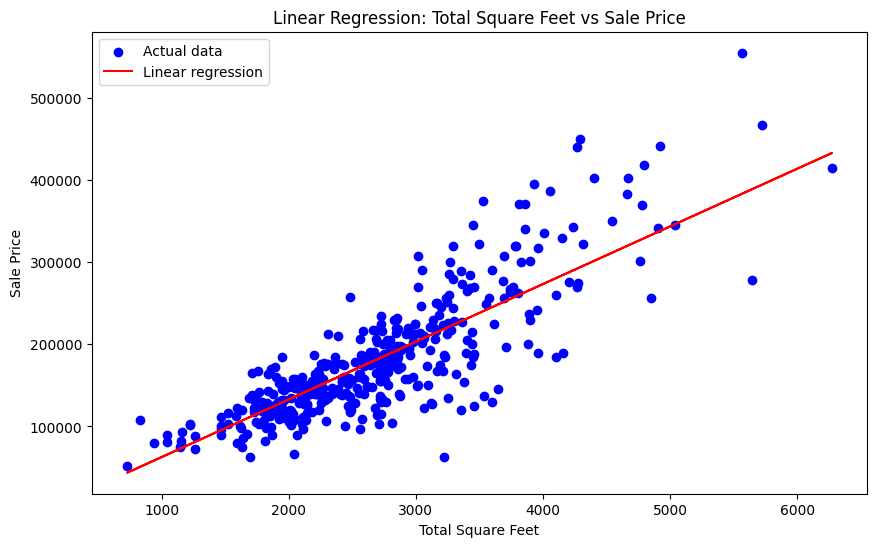

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculating R2 score
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

# Plotting the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', label='Linear regression')
plt.xlabel('Total Square Feet')
plt.ylabel('Sale Price')
plt.title('Linear Regression: Total Square Feet vs Sale Price')
plt.legend()
plt.show()